In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# **Loading Data for Parkinson's Disease Prediction from UCI- Machine Learning Repository**

In [ ]:
parkinson_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
parkinson_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# **Exploratory Data Analysis**

**Descriptive Statistics**

In [ ]:
parkinson_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


**Data Visualization using Count Plot**

<Axes: xlabel='status', ylabel='count'>

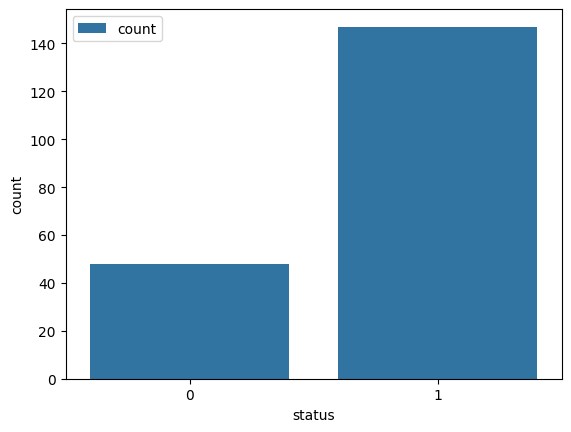

In [ ]:
sns.countplot(x=parkinson_df['status'],label='count')

**Data Visualization using Scatter Plot**

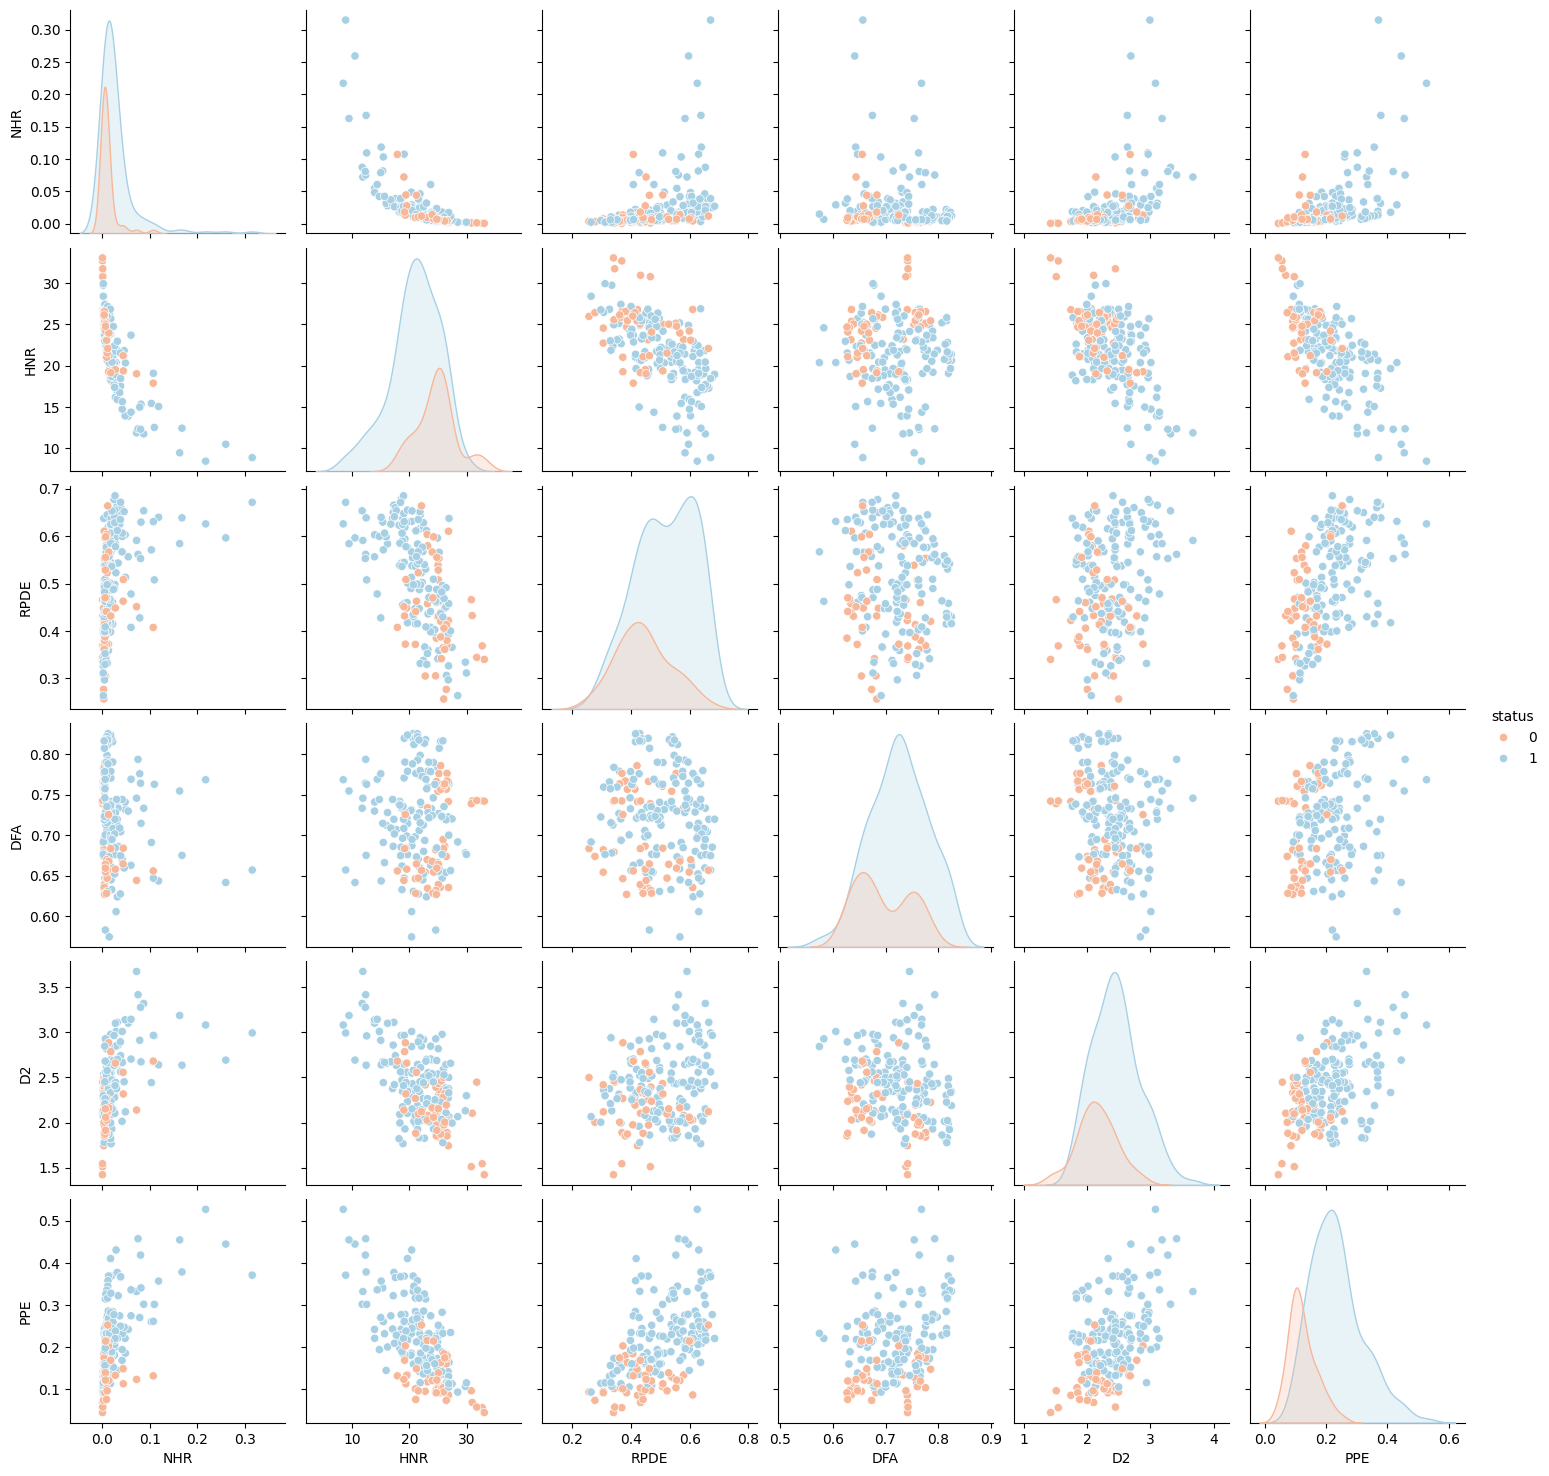

In [ ]:
cols=['status','NHR','HNR','RPDE','DFA','D2','PPE']
sns.pairplot(data=parkinson_df[cols],hue='status',palette='RdBu')

# **Data Pre-Processing**

**Checking for Missing Values**

In [ ]:
parkinson_df.isna().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


**Identifying the datatypes of each attribute in the dataset**

In [ ]:
parkinson_df.dtypes

,0
name,object
MDVP:Fo(Hz),float64
MDVP:Fhi(Hz),float64
MDVP:Flo(Hz),float64
MDVP:Jitter(%),float64
MDVP:Jitter(Abs),float64
MDVP:RAP,float64
MDVP:PPQ,float64
Jitter:DDP,float64
MDVP:Shimmer,float64


**Converting the categorical attributes to numerical attributes**

In [ ]:
label_encoder = preprocessing.LabelEncoder()
parkinson_df['name'] = label_encoder.fit_transform(parkinson_df['name'])
parkinson_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
parkinson_df.dtypes

,0
name,int64
MDVP:Fo(Hz),float64
MDVP:Fhi(Hz),float64
MDVP:Flo(Hz),float64
MDVP:Jitter(%),float64
MDVP:Jitter(Abs),float64
MDVP:RAP,float64
MDVP:PPQ,float64
Jitter:DDP,float64
MDVP:Shimmer,float64


**Extracting the target variable and dependent variables**

In [ ]:
y_df = parkinson_df['status']
y=y_df.values
X_df = parkinson_df.loc[:, parkinson_df.columns != "status"]
X=X_df.values
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (195, 23)
Shape of y: (195,)


In [ ]:
#Printing first column of X
X[:1,]

array([[ 0.000000e+00,  1.199920e+02,  1.573020e+02,  7.499700e+01,
         7.840000e-03,  7.000000e-05,  3.700000e-03,  5.540000e-03,
         1.109000e-02,  4.374000e-02,  4.260000e-01,  2.182000e-02,
         3.130000e-02,  2.971000e-02,  6.545000e-02,  2.211000e-02,
         2.103300e+01,  4.147830e-01,  8.152850e-01, -4.813031e+00,
         2.664820e-01,  2.301442e+00,  2.846540e-01]])

# **Feature Scaling**

**Scaling dependent attributes to fit a standard normal distribution.**

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#Printing first column of X
X[:1,]

array([[-1.72319115, -0.82929965, -0.43616456, -0.95203729,  0.33491386,
         0.74975946,  0.13296255,  0.76080023,  0.13175532,  0.74598495,
         0.73953578,  0.60785907,  1.11914677,  0.33298451,  0.60753214,
        -0.06789281, -0.19322537, -0.8078385 ,  1.76081412,  0.80132308,
         0.48047686, -0.21053082,  0.86888575]])

# **Splitting the data for Testing and Training**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (146, 23)
Shape of testing feature: (49, 23)
Shape of training label: (146,)
Shape of training label: (49,)


# **Predictive Modelling**

**Evalauting the model**

In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    # Printing results
    print('Accuracy: %.2f'%(acc*100))
    print('Precision:', prec)
    print('Recall:', rec)
    print('F1 Score:', f1)
    print('Cohens Kappa Score:', kappa)
    print('Area Under Curve:', auc)
    print('Confusion Matrix:\n')
    sns.heatmap(cm.T,square=True,annot=True,fmt='d',cbar=False)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

**Leveraged Logistic Regression with RFE and GridSearchCV:**


Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 83.67
Precision: 0.8536585365853658
Recall: 0.9459459459459459
F1 Score: 0.8974358974358975
Cohens Kappa Score: 0.5025380710659898
Area Under Curve: 0.9121621621621622
Confusion Matrix:



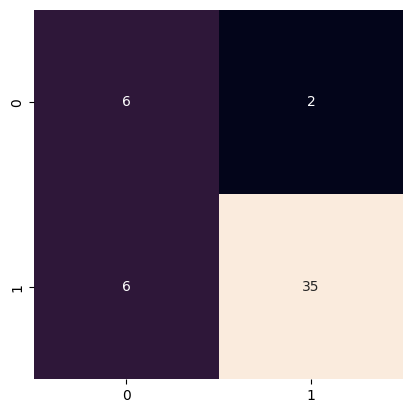

In [ ]:
# Recursive Feature Elimination (RFE) with Logistic Regression
lr = LogisticRegression(random_state=1)
rfe = RFE(lr, n_features_to_select=10)  # Choose the number of features to select
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Logistic Regression with GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, verbose=0)
grid_lr.fit(X_train_rfe, y_train)

# Evaluate the Logistic Regression Model
print("\nBest parameters for Logistic Regression:", grid_lr.best_params_)
lr_eval = evaluate_model(grid_lr, X_test_rfe, y_test)


***Decision Tree Model***

Accuracy: 93.88
Precision: 0.9473684210526315
Recall: 0.972972972972973
F1 Score: 0.9599999999999999
Cohens Kappa Score: 0.8296639629200464
Area Under Curve: 0.9031531531531531
Confusion Matrix:



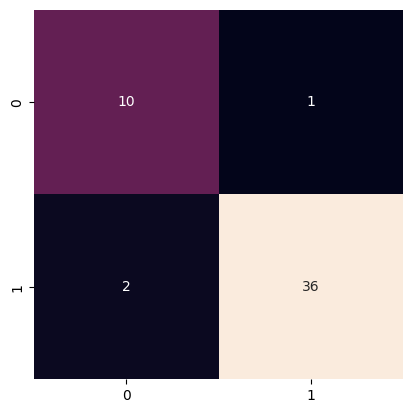

In [ ]:
# Building Decision Tree model
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

***K-Nearest Neighbors Model***

Accuracy: 97.96
Precision: 0.9736842105263158
Recall: 1.0
F1 Score: 0.9866666666666666
Cohens Kappa Score: 0.9432213209733488
Area Under Curve: 0.9966216216216216
Confusion Matrix:



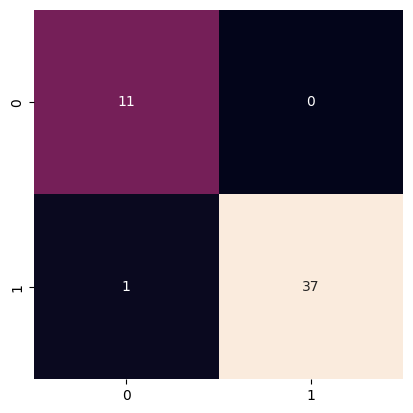

In [ ]:
# Building K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)


***Logistic Regression Model***

Accuracy: 89.80
Precision: 0.9
Recall: 0.972972972972973
F1 Score: 0.935064935064935
Cohens Kappa Score: 0.6986469864698648
Area Under Curve: 0.945945945945946
Confusion Matrix:



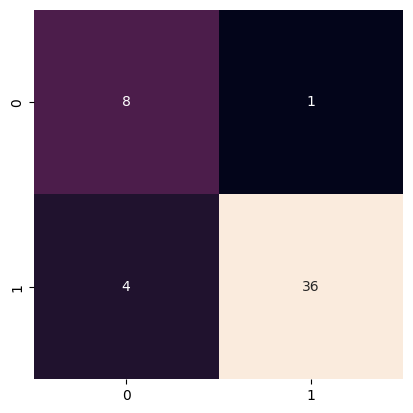

In [ ]:
# Building Logistic Regression model
lrc = LogisticRegression(solver='lbfgs', max_iter=1000)
lrc.fit(X_train, y_train)

# Evaluate Model
lrc_eval = evaluate_model(lrc, X_test, y_test)


# **Data Visualization**

**Model Comparison**

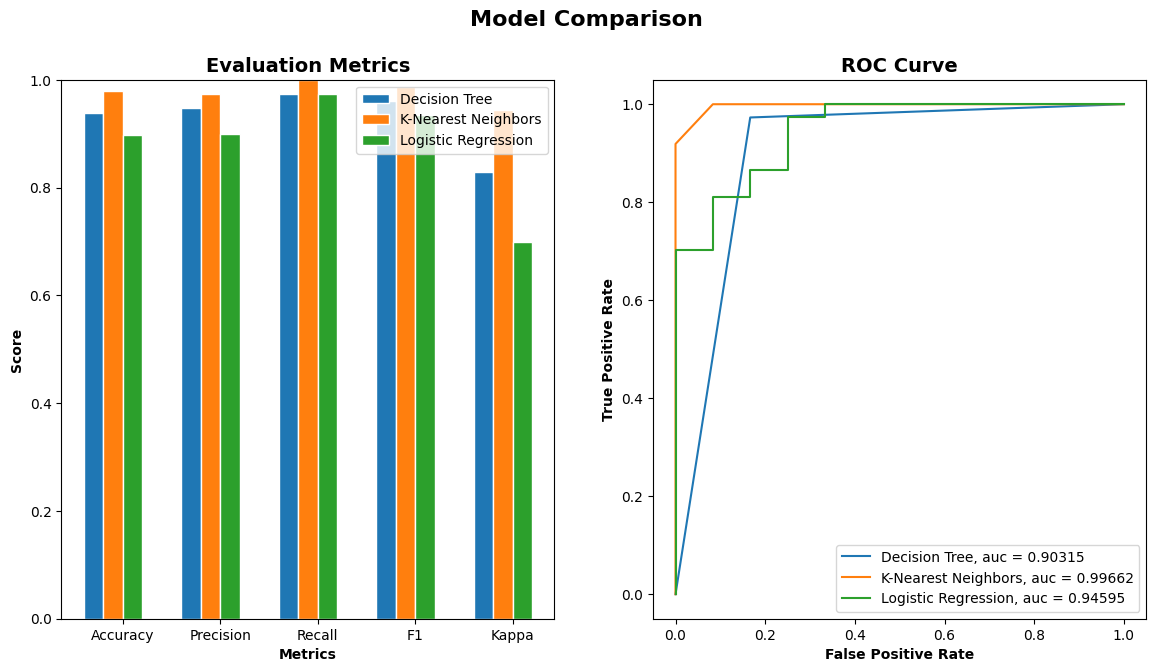

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
lrc_score = [lrc_eval['acc'], lrc_eval['prec'], lrc_eval['rec'], lrc_eval['f1'], lrc_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r3, lrc_score, width=barWidth, edgecolor='white', label='Logistic Regression')
## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Neighbors, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(lrc_eval['fpr'], lrc_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lrc_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)
